In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

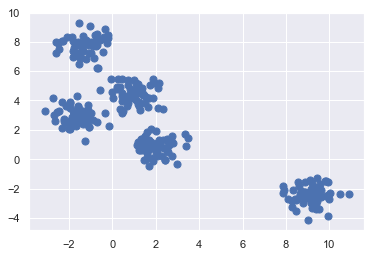

In [33]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.6, random_state=0)
plt.scatter(X[:,0],X[:,1], s=50);

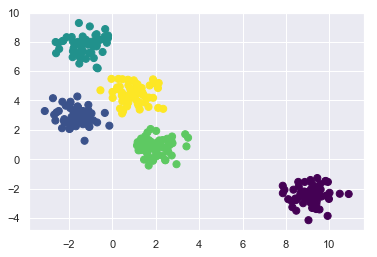

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_means = kmeans.predict(X)

In [35]:
y_means

array([1, 0, 4, 1, 3, 3, 2, 4, 2, 0, 1, 1, 4, 0, 0, 4, 4, 2, 1, 3, 2, 3,
       4, 1, 3, 4, 3, 2, 0, 3, 2, 1, 4, 1, 1, 0, 2, 0, 3, 2, 4, 3, 4, 4,
       1, 3, 2, 3, 1, 3, 3, 2, 3, 3, 1, 3, 2, 0, 0, 1, 3, 2, 3, 0, 0, 1,
       1, 0, 3, 1, 3, 2, 1, 1, 1, 1, 1, 0, 4, 2, 0, 0, 4, 1, 1, 0, 2, 2,
       2, 3, 0, 2, 2, 1, 3, 0, 4, 0, 0, 4, 1, 3, 2, 0, 2, 4, 3, 2, 4, 3,
       4, 0, 3, 2, 1, 2, 4, 1, 3, 2, 4, 0, 1, 0, 1, 3, 3, 2, 2, 0, 2, 0,
       1, 0, 0, 2, 1, 1, 3, 1, 4, 1, 1, 3, 4, 3, 4, 3, 0, 4, 1, 0, 1, 4,
       1, 4, 3, 0, 1, 0, 3, 4, 0, 4, 4, 3, 4, 1, 0, 4, 2, 2, 4, 1, 2, 4,
       0, 0, 3, 2, 4, 3, 2, 4, 3, 0, 2, 4, 4, 4, 3, 1, 4, 0, 4, 4, 0, 3,
       0, 2, 3, 1, 4, 0, 2, 0, 4, 1, 3, 0, 2, 1, 2, 3, 4, 4, 0, 3, 3, 3,
       2, 4, 1, 2, 2, 3, 3, 0, 4, 0, 0, 4, 4, 1, 4, 3, 3, 4, 1, 2, 0, 1,
       0, 2, 4, 2, 1, 1, 0, 1, 0, 0, 0, 2, 3, 2, 2, 3, 0, 2, 2, 1, 4, 4,
       0, 2, 0, 0, 4, 1, 4, 3, 2, 0, 3, 4, 2, 2, 2, 4, 1, 1, 2, 2, 4, 3,
       2, 3, 0, 0, 1, 2, 3, 3, 1, 1, 1, 3, 2, 4], d

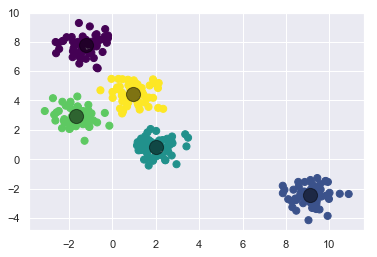

In [36]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    #Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while(True):
        #Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        #Find the new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                   for i in range(n_clusters)])
        
        #Check for convergency
        if np.all(centers == new_centers):
            break
        
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 5)
plt.scatter(X[:,0], X[:,1], c=y_means, s=50, cmap='viridis')

plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5);